In [ ]:
# Built-in libraries
import glob
import imageio
import os
import os.path
import time
import pathlib

# Third-party libraries for data manipulation and visualization
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
import seaborn as sns

# Keras and TensorFlow for building and training machine learning models
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.layers import Average, BatchNormalization, concatenate, Conv2D, Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


# Scikit-learn for model evaluation and data splitting
from sklearn.metrics import auc, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split

from collections import Counter



In [ ]:

!gdown --id 1jEHy3f-2niR-FsEygVjzBfhb8er4Ycfy
!unzip MatrriVaSha-isolated.zip
!rm MatrriVaSha-isolated.zip


In [ ]:
path ='/content/MatrriVaSha-isolated'

In [ ]:

# Set the path to the directory containing the image files
data = pathlib.Path(path)

# Find all files with any extension in the subdirectories of the given path
image_files = data.glob('*/*.*')

# Extract the file extensions from the image files
image_extensions = [file.suffix for file in image_files]

# Count the occurrences of each file extension
image_counts = Counter(image_extensions)

# Iterate over the image_counts dictionary and print the total number of images for each file type
for ext, count in image_counts.items():
    print(f"Total number of {ext} images: {count}")


Total number of .jpg images: 65102


In [ ]:
numbers = []
for i in range(0,51):
  numbers.append(str(i))
len(numbers)

51

In [ ]:
import os
import pandas as pd
types=numbers

n_class = len(numbers)

dir=path

train_data = []

for index, val in enumerate(types):
    for file in os.listdir(os.path.join(dir, val)):
        train_data.append([val + "/" + file, index, val])

df = pd.DataFrame(train_data, columns = ['file', 'label','class'])

df

,file,label,class
0,0/0_DHA_12_1_190.jpg,0,0
1,0/0_DHA_12_1_28.jpg,0,0
2,0/0_DHA_13_1_685.jpg,0,0
3,0/0_DHA_13_1_538.jpg,0,0
4,0/0_DHA_15_1_583.jpg,0,0
...,...,...,...
65097,50/0_DHA_13_1_172.jpg,50,50
65098,50/0_BHO_18_2_1029.jpg,50,50
65099,50/0_DHA_15_1_576.jpg,50,50
65100,50/0_BAR_13_1_350.jpg,50,50


In [ ]:
class_counts = df['class'].value_counts()
print(class_counts)

3     1294
26    1288
6     1287
4     1286
17    1286
38    1285
0     1284
5     1284
7     1283
34    1282
19    1282
9     1282
8     1282
11    1281
12    1281
10    1280
40    1278
1     1277
32    1277
29    1277
22    1277
42    1276
24    1276
41    1276
13    1276
37    1276
33    1276
14    1276
35    1275
2     1275
47    1275
39    1275
31    1275
21    1274
36    1273
43    1273
16    1273
46    1272
30    1271
23    1271
15    1271
18    1270
44    1269
48    1269
50    1269
27    1269
20    1269
28    1268
45    1267
49    1267
25    1267
Name: class, dtype: int64


In [ ]:
df.shape

(65102, 3)

In [ ]:
image_size = 75
channels = 3
subset_size = 22000

In [ ]:
# Calculate the number of subsets required to cover all N thousand images
num_subsets = int(np.ceil(len(df) / subset_size))
num_subsets

3

In [ ]:
from tensorflow.keras.applications import ResNet50

# Define input shape for all models
input_shape = (image_size, image_size, channels)

# Load pre-trained models
resnet = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')


for layer in resnet.layers[:16]:
    layer.trainable = False
for layer in resnet.layers[16:]:
    layer.trainable = True


# Add new trainable layers
x = resnet.layers[-1].output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(n_class,activation = 'softmax')(x)

resnet_model = Model(resnet.input, output, name= "Resnet50")

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.applications import DenseNet121

# Define input shape for all models
input_shape = (image_size, image_size, channels)

# Load pre-trained models
densenet = DenseNet121(input_shape=input_shape, include_top=False, weights='imagenet')


for layer in densenet.layers[:16]:
    layer.trainable = False
for layer in densenet.layers[16:]:
    layer.trainable = True


# Add new trainable layers
x = densenet.layers[-1].output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)


output = Dense(n_class,activation = 'softmax')(x)

densenet_model = Model(densenet.input, output, name= "DenseNet121")

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Define input shape for all models
input_shape = (image_size, image_size, channels)

# Load pre-trained models
effnet = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')


for layer in effnet.layers[:16]:
    layer.trainable = False
for layer in effnet.layers[16:]:
    layer.trainable = True


# Add new trainable layers
x = effnet.layers[-1].output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(n_class,activation = 'softmax')(x)

effnet_model = Model(effnet.input, output, name= "EfficientNetB0")

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.applications import Xception

# Define input shape for all models
input_shape = (image_size, image_size, channels)

# Load pre-trained models
xcept = Xception(input_shape=input_shape, include_top=False, weights='imagenet')

# Fine-tune pre-trained models
for layer in xcept.layers[:16]:
    layer.trainable = False
for layer in xcept.layers[16:]:
    layer.trainable = True


# Add new trainable layers
x = xcept.layers[-1].output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(n_class,activation = 'softmax')(x)

xcept_model = Model(xcept.input, output, name= "Xception")

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.layers import Layer
from tensorflow.keras.initializers import GlorotUniform

class WeightedAverage(Layer):

    def __init__(self):
        super(WeightedAverage, self).__init__()

    def build(self, input_shape):

        self.W = self.add_weight(
                    shape=(1,1,len(input_shape)),
                    initializer=GlorotUniform(),
                    dtype=tf.float32,
                    trainable=True)
    def call(self, inputs):

        inputs = [tf.expand_dims(i, -1) for i in inputs]
        inputs = Concatenate(axis=-1)(inputs)
        weights = tf.nn.softmax(self.W, axis=-1)

        return tf.reduce_mean(weights*inputs, axis=-1)

In [ ]:
def majority_vote(predictions):
    stacked_preds = tf.stack(predictions, axis=1) # stack along new axis
    print(stacked_preds.shape[0])
    summed_preds = tf.reduce_sum(stacked_preds, axis=1) # sum along stacked axis
    max_votes = tf.reduce_max(summed_preds, axis=1, keepdims=True) # find max votes for each example
    # Create a binary mask indicating which classes had max votes
    winners = tf.cast(tf.equal(summed_preds, max_votes), tf.float32)
    return winners


In [ ]:
# import concatenate layer and MaxPooling1D layer
from tensorflow.keras.layers import Concatenate, Lambda, MaxPooling1D, Reshape

# get list of models
models = [resnet_model, densenet_model, effnet_model, xcept_model]

input = Input(shape=(image_size, image_size, channels), name='input') # input layer

# get output for each model input
outputs = [model(input) for model in models]

# concatenate the outputs of the models along the sequence dimension
stacked = Concatenate(axis=1)(outputs)

# reshape the concatenated tensor to a 3D tensor for MaxPooling1D layer
stacked = Reshape((-1, len(models)))(stacked)

# add a max pooling layer
max_pooled = MaxPooling1D(pool_size=2)(stacked)

# flatten the max pooled tensor
x = Flatten()(max_pooled)

# add further layers
output = Dense(n_class, activation='softmax', name='output')(x) # output layer

# create concatenated model
model = Model(input, output, name= 'Concatenated_Model')


In [ ]:
model.summary()

Model: "Concatenated_Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 Resnet50 (Functional)       (None, 51)                   2467115   ['input[0][0]']               
                                                          5                                       
                                                                                                  
 DenseNet121 (Functional)    (None, 51)                   7592563   ['input[0][0]']               
                                                                                                  
 EfficientNetB0 (Functional  (None, 51)                   4736726   ['input[0][0]

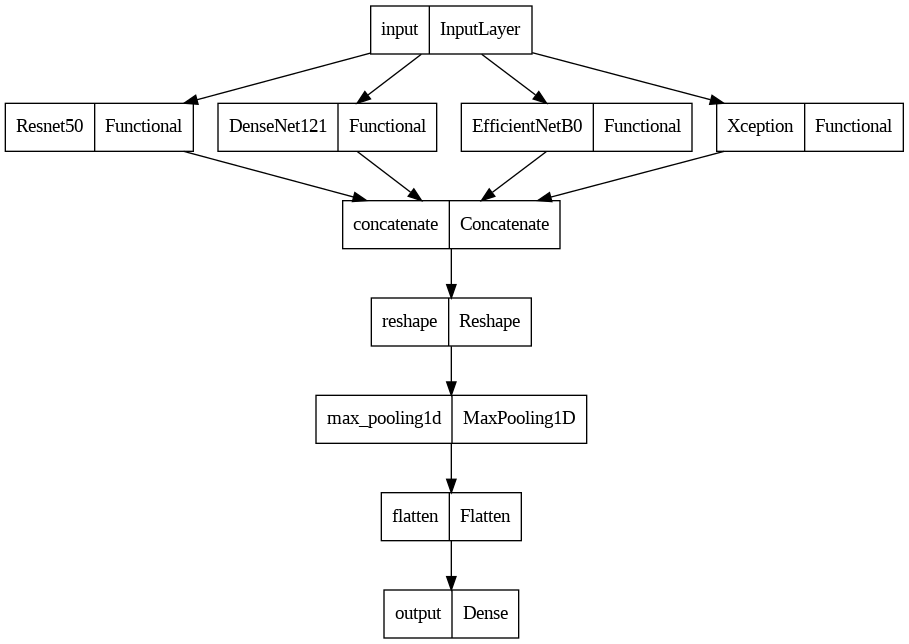

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your Keras model
plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True)


In [ ]:
optimizer = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
reducer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.70, patience=5, verbose=1, min_lr=1e-5)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# define the filepath where the best weights will be saved
filepath = 'model.h5'

# define the checkpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [ ]:
def scheduler(epoch, lr):
    if epoch == 1:
        return 0.003
    else:
        return lr

lr_callback = LearningRateScheduler(scheduler)

Subset number : 1
X_train: (17600, 75, 75, 3)
X_val: (4400, 75, 75, 3)
Y_train: (17600, 51)
Y_val: (4400, 51)
Epoch 1/50
550/550 [==============================] - 325s 264ms/step - loss: 3.8124 - accuracy: 0.0678 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 3.5795 - val_accuracy: 0.1332 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0030
Epoch 2/50
550/550 [==============================] - 136s 247ms/step - loss: 3.2238 - accuracy: 0.1981 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.8033 - val_accuracy: 0.2982 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0030
Epoch 3/50
550/550 [==============================] - 136s 247ms/step - loss: 2.4426 - accuracy: 0.4496 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.1027 - val_accuracy: 0.5930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0030
Epoch 4/50
550/550 [==============================] - 136s 246ms/step - loss: 1.8244 - accuracy: 0.6307 - precision: 0.

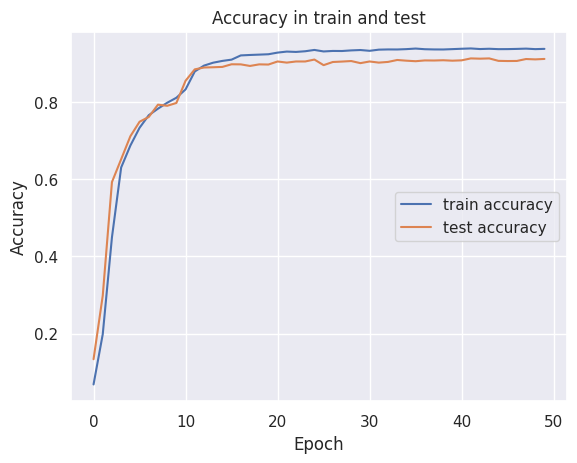

Subset number : 2
X_train: (17600, 75, 75, 3)
X_val: (4400, 75, 75, 3)
Y_train: (17600, 51)
Y_val: (4400, 51)
Epoch 1/50
550/550 [==============================] - 136s 247ms/step - loss: 5.8018 - accuracy: 0.0427 - precision: 0.2175 - recall: 0.0385 - val_loss: 4.7402 - val_accuracy: 0.0414 - val_precision: 0.7344 - val_recall: 0.0402 - lr: 7.2030e-04
Epoch 2/50
550/550 [==============================] - 135s 246ms/step - loss: 3.9677 - accuracy: 0.0665 - precision: 0.9342 - recall: 0.0371 - val_loss: 3.4037 - val_accuracy: 0.1830 - val_precision: 0.9946 - val_recall: 0.0418 - lr: 0.0030
Epoch 3/50
550/550 [==============================] - 135s 246ms/step - loss: 2.6797 - accuracy: 0.4534 - precision: 0.9947 - recall: 0.0430 - val_loss: 2.0675 - val_accuracy: 0.6664 - val_precision: 0.9946 - val_recall: 0.0420 - lr: 0.0030
Epoch 4/50
550/550 [==============================] - 135s 246ms/step - loss: 1.7280 - accuracy: 0.6947 - precision: 0.9968 - recall: 0.0699 - val_loss: 1.4087 - v

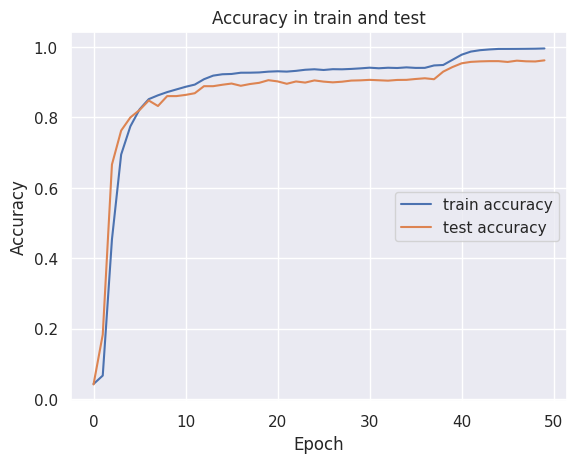

Subset number : 3
X_train: (16881, 75, 75, 3)
X_val: (4221, 75, 75, 3)
Y_train: (16881, 51)
Y_val: (4221, 51)
Epoch 1/50
528/528 [==============================] - 134s 254ms/step - loss: 5.5034 - accuracy: 0.0339 - precision: 0.2595 - recall: 0.0325 - val_loss: 4.4282 - val_accuracy: 0.0301 - val_precision: 0.9542 - val_recall: 0.0296 - lr: 0.0015
Epoch 2/50
528/528 [==============================] - 130s 246ms/step - loss: 3.4516 - accuracy: 0.0945 - precision: 0.9638 - recall: 0.0331 - val_loss: 2.5816 - val_accuracy: 0.3457 - val_precision: 0.9762 - val_recall: 0.0291 - lr: 0.0030
Epoch 3/50
528/528 [==============================] - 130s 246ms/step - loss: 2.0984 - accuracy: 0.5208 - precision: 0.9913 - recall: 0.0338 - val_loss: 1.7209 - val_accuracy: 0.5951 - val_precision: 0.9836 - val_recall: 0.0284 - lr: 0.0030
Epoch 4/50
528/528 [==============================] - 130s 246ms/step - loss: 1.5319 - accuracy: 0.6214 - precision: 0.9947 - recall: 0.0775 - val_loss: 1.3774 - val_a

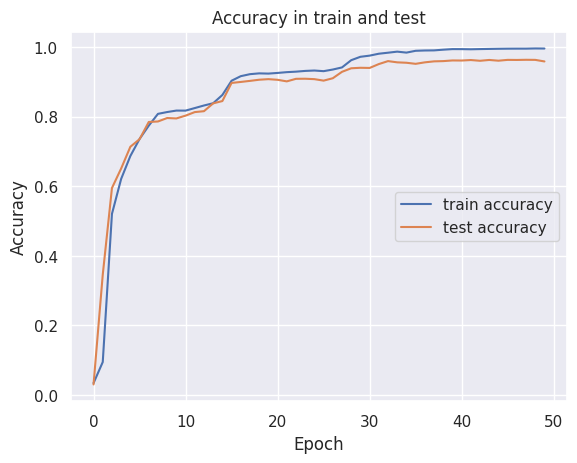

In [ ]:
# Loop over the subsets and train the model on each subset
for i in range(num_subsets):

    print(f"Subset number : {i+1}")

    # Get the start and end index for the current subset
    start_idx = i * subset_size
    end_idx = min((i + 1) * subset_size, len(df))

    # Load the subset into memory
    subset = df.iloc[start_idx:end_idx]
    images = []
    labels = []
    for index, file in enumerate(subset['file'].values):
        image = cv2.imread(os.path.join(dir,file))
        if image is not None:
            # Apply bilateral filter
            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            thresh = cv2.resize(thresh, (image_size, image_size))
            thresh = cv2.merge((thresh,thresh,thresh))
            images.append(thresh)
            labels.append(subset['label'].values[index])

    # Convert the images and labels to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Split the data into training and validation sets
    X_train, X_test, Y_train, Y_test = train_test_split(images,
                                                      labels,
                                                      test_size=0.2,
                                                      random_state=42)
    Y_train = to_categorical(Y_train, n_class)
    Y_test = to_categorical(Y_test, n_class)

    # Convert the data to tensors
    X_train = tf.convert_to_tensor(X_train)
    X_val = tf.convert_to_tensor(X_test)
    Y_train = tf.convert_to_tensor(Y_train)
    Y_val = tf.convert_to_tensor(Y_test)

    print(f'X_train:',X_train.shape)
    print(f'X_val:',X_test.shape)
    print(f'Y_train:',Y_train.shape)
    print(f'Y_val:',Y_test.shape)

    training_data = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
    validation_data = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

    train_data_batches = training_data.shuffle(buffer_size=32*(X_train.shape[0]//32)).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
    validation_data_batches = validation_data.shuffle(buffer_size=32*(X_test.shape[0]//32)).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

    hist = model.fit(train_data_batches,
                    epochs = 50,
                    validation_data=validation_data_batches,
                    callbacks=[reducer,lr_callback],
                    verbose=1)

    sns.set(style='darkgrid')

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])


    plt.title('Accuracy in train and test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train accuracy', 'test accuracy', 'train loss', 'test loss'], loc='center right')

    plt.show()